In [1]:
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

#### **🛩 Import libraries and dataset**
****

1. Import libraries necessary and dataset

In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

from itertools import combinations 
from scipy import stats 

from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder 
from sklearn.model_selection import train_test_split, cross_val_score 
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

from sklearn.linear_model import LogisticRegression 




    1. Write the code that imports the train and test datasets (hint: use pd.read_csv) and assign it to a variables train and test

In [ ]:
train = train[['id','Gender', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Seat comfort',
       'Checkin service',
       'Cleanliness', 'Departure Delay in Minutes', 'satisfaction']]
test = test[['id','Gender', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Seat comfort',
       'Checkin service',
       'Cleanliness', 'Departure Delay in Minutes', 'satisfaction']]

In [3]:
train.head()

NameError: name 'train' is not defined

2. Create a table that outlines some information on our train data including: Count, unique, frequency, mean, standard deviation etc.

In [ ]:
desc = pd.DataFrame(train.describe(include = 'all').transpose())
desc

/Users/rayanbessadi/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:4009: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Gender,103904,2,Female,52727,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,103904.0,NaN,NaN,NaN,39.379706,15.114964,7.0,27.0,40.0,51.0,85.0
Type of Travel,103904,2,Business travel,71655,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Class,103904,3,Business,49665,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Flight Distance,103904.0,NaN,NaN,NaN,6.703721,0.917302,3.433987,6.025866,6.736967,7.463363,8.513787
Inflight wifi service,103904.0,NaN,NaN,NaN,2.729683,1.327829,0.0,2.0,3.0,4.0,5.0
Departure/Arrival time convenient,103904.0,NaN,NaN,NaN,3.060296,1.525075,0.0,2.0,3.0,4.0,5.0
Seat comfort,103904.0,NaN,NaN,NaN,3.439396,1.319088,0.0,2.0,4.0,5.0,5.0
Checkin service,103904.0,NaN,NaN,NaN,3.30429,1.265396,0.0,3.0,3.0,4.0,5.0
Cleanliness,103904.0,NaN,NaN,NaN,3.286351,1.312273,0.0,2.0,3.0,4.0,5.0


4. Use the summary stats function to view important information such as number of missing values, mean value, max value, data type etc

In [ ]:
def summary_stats(df): 
    print(f'The shape of the data is: {df.shape}')
    summary = pd.DataFrame(df.dtypes, columns = ['data type'])
    summary['Number of missing values'] = df.isnull().sum().values 
    summary['% of missing values'] = df.isnull().sum().values / len(df) * 100 
    summary['min value'] = desc['min'].values
    summary['mean value'] = desc['mean'].values
    summary['max value'] = desc['max'].values
    summary['mode value'] = df.mode().values[0]
    return summary


    1. Run the above function of the train dataset

5. Look at those variables that are most corrleated with whether someone is satisfied or not

    1. Gather a list of the categories that are numerical (int64) and those that are categorical (object)

    2. make a copy of our train dataset using train.copy() and assign it to a variable called train_display

    3. Label encode the categorical columns 
        a. To do this assign the object LabelEncoder() to the variable le

        b. use a for loop to re-assign each categorical column train_display[col] to its label encoded version

The below code should now output a list of each category and its correlation with satisfaction

In [ ]:
train_display.corr().loc['satisfaction'].abs().sort_values(ascending=False)

satisfaction                         1.000000
Class                                0.449321
Type of Travel                       0.449000
Seat comfort                         0.349459
Cleanliness                          0.305198
Flight Distance                      0.298780
Inflight wifi service                0.284245
Checkin service                      0.236174
Age                                  0.137167
Departure/Arrival time convenient    0.051601
Departure Delay in Minutes           0.050494
Gender                               0.012211
Name: satisfaction, dtype: float64

#### **🛩 Exploratory data analysis**
****

6. Create some count plots of non-numerical categorical columns to view how many of each unique valeue that there is? (q: what insights can we get from this?)

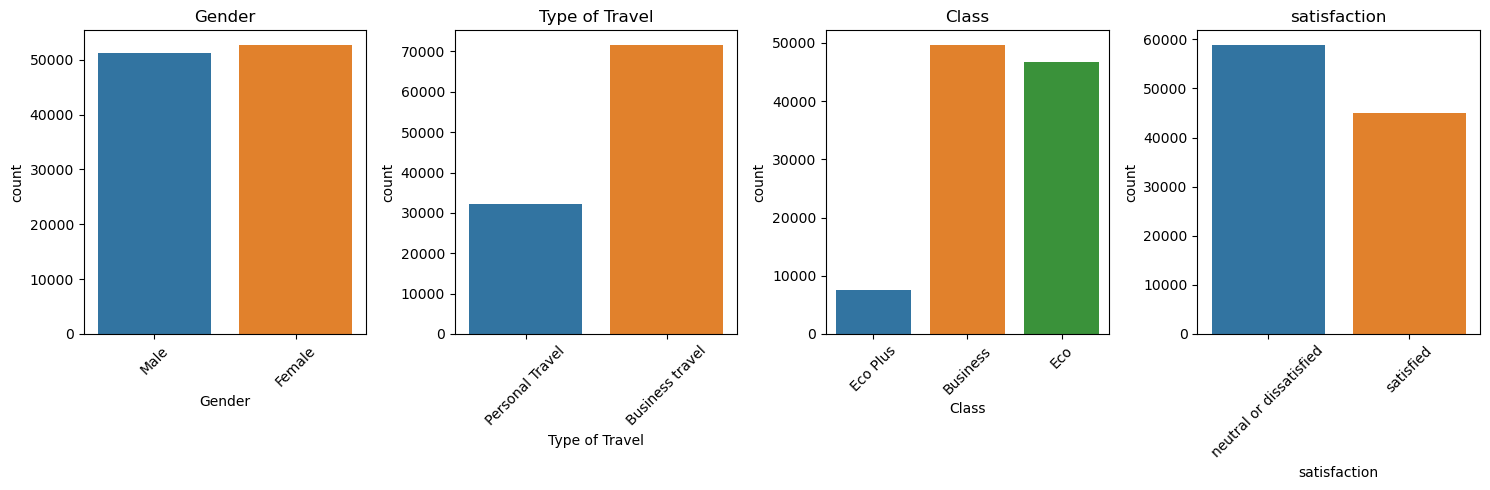

In [ ]:
fig, axes = plt.subplots(1, 4, figsize=(15, 5))
for i, column in enumerate(categorical_columns.columns):
    ax = axes[i]
    sns.countplot(data=categorical_columns, x=column, ax=ax)
    ax.set_title(column)
    ax.tick_params(axis='x', rotation=45)

    
plt.tight_layout()
plt.show()

    1. Fill in the blanks below

<div class="alert alert-block alert-info" style="background-color: #C2F3D3; color: black;">
- There is an equal number of ____ and _____ participants in the survey. </br>
- Most customers on this airline are ________ travel customers and most of them purchase tickets for ________ class, followed by ____ class. </br>
- A large proportion of customers felt ____________________ with the airline.
</div>

7. Create some count plots of numerical categorical columns to view how many of each unique valeue that there is? (q: what insights can we get from this?)

    1. Create a list of all of the columns that are numerical but have only a few unique values, you can do this by running 'train[col].unique()' for all columns where 'col' is the column name

In [ ]:
categoric = []


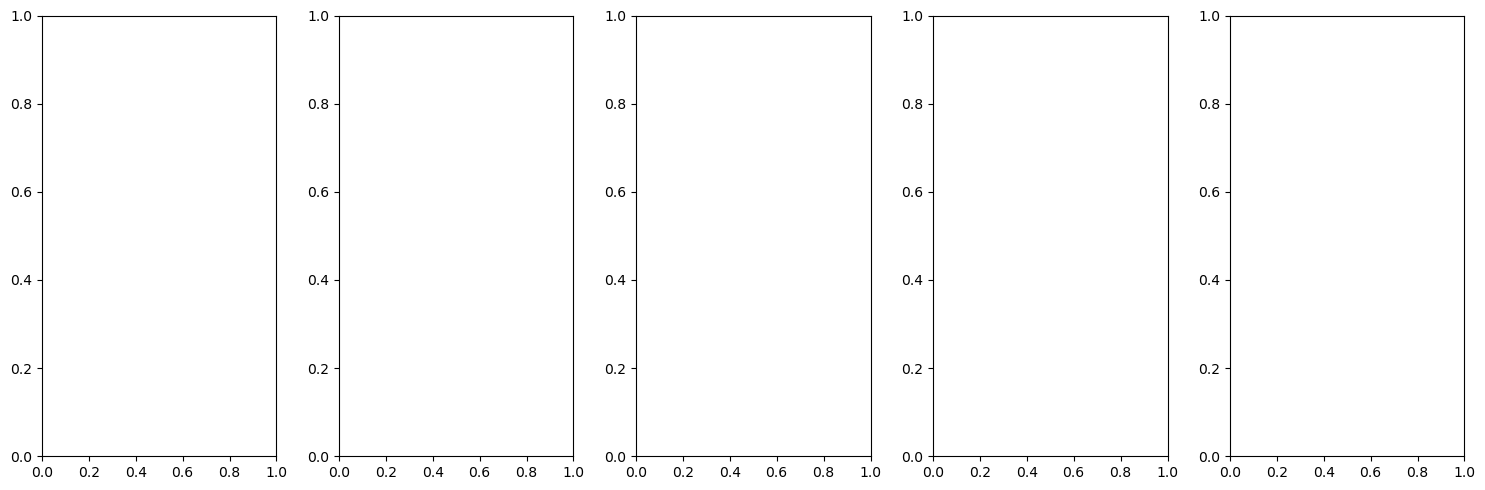

In [ ]:
fig, axes = plt.subplots(1, 5, figsize=(15, 5))
for i, column in enumerate(categoric):
    col = i % 5
    
    ax = axes[col]
    sns.countplot(data=train, x=column, ax=ax)
    
plt.tight_layout()
plt.show()

8. Create some Kernel density plots for view the distribution of continuous variables

    1. Find the numerical columns that are continuous, you can do this by running 'train[col].unique()' for all columns where 'col' is the column name

In [ ]:
numeric = []

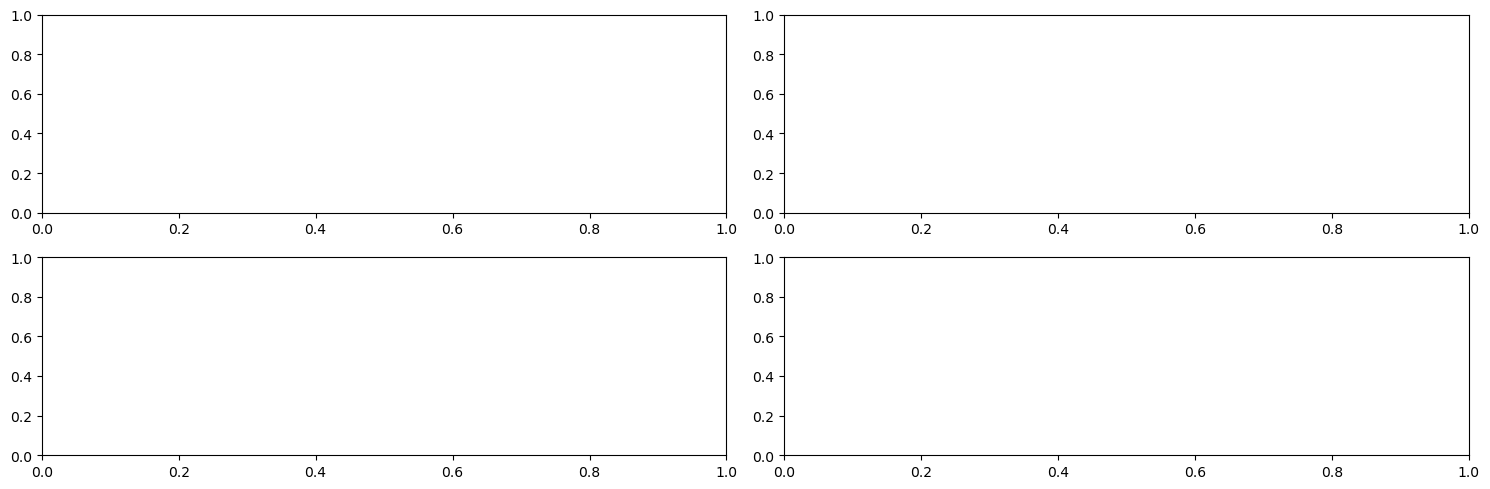

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(15, 5))
for i, column in enumerate(numeric):
    row = i // 2
    col = i % 2
    
    ax = axes[row, col]
    sns.kdeplot(data=train, x=column, ax=ax)

plt.tight_layout()
plt.show()

    2. Fill in the gaps

<div class="alert alert-block alert-info" style="background-color: #C2F3D3; color: black;">
The variables ______________ and ________________ are all heavily right-skewed. 
</div>

#### **🛩 Machine learning preparation**
****

In [ ]:
clean_train = train.copy()

    1. Fill in the gaps

9. Finding the logarithm can help in the following ways:
    - Normalize the data: Transformation can help in reducing the impact of e________ values and make the data conform more closely to a n________ distribution.

    - Linearize relationships: In some cases, taking the logarithm of a variable can help linearize relationships between variables, making them more suitable for l________ regression or other linear-based models.

    - Reduce skewness: Skewed data can violate the assumptions of certain models. By applying the logarithm transformation, you can reduce the skewness and make the data more sy______.

    2. From the graphs in section 8, make a list of the categories that were skewed and assign them to a variable called right_skewed

In [ ]:
right_skewed = []

In [ ]:
# Normalize the numeric variables 
for x in right_skewed:
    clean_train[x] = np.log(clean_train[x])

clean_train

,Gender,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Seat comfort,Checkin service,Cleanliness,Departure Delay in Minutes,satisfaction
0,Male,13,Personal Travel,Eco Plus,6.131226,3,4,5,4,5,3.218876,neutral or dissatisfied
1,Male,25,Business travel,Business,5.459586,3,2,1,1,1,0.000000,neutral or dissatisfied
2,Female,26,Business travel,Business,7.040536,2,2,5,4,5,-inf,satisfied
3,Female,25,Business travel,Business,6.331502,2,5,2,1,2,2.397895,neutral or dissatisfied
4,Male,61,Business travel,Business,5.365976,3,3,5,3,3,-inf,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...
103899,Female,23,Business travel,Eco,5.257495,2,1,2,2,2,1.098612,neutral or dissatisfied
103900,Male,49,Business travel,Business,7.760893,4,4,5,5,4,-inf,satisfied
103901,Male,30,Business travel,Business,7.598399,1,1,5,5,4,1.945910,neutral or dissatisfied
103902,Female,22,Business travel,Eco,6.907755,1,1,1,5,1,-inf,neutral or dissatisfied


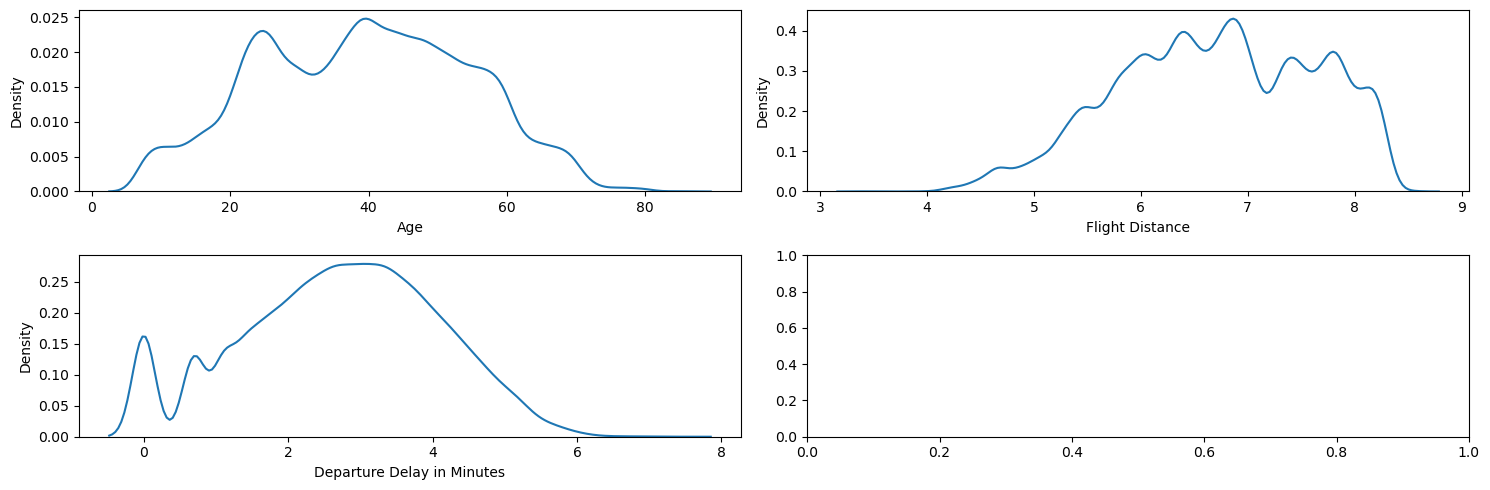

In [ ]:
numeric = ["Age", "Flight Distance", "Departure Delay in Minutes"]

fig, axes = plt.subplots(2, 2, figsize=(15, 5))
for i, column in enumerate(numeric):
    row = i // 2
    col = i % 2
    
    ax = axes[row, col]
    sns.kdeplot(data= clean_train, x=column, ax=ax)
    
plt.tight_layout()
plt.show()

    1. Fill in the gap

<div class="alert alert-block alert-info" style="background-color: #C2F3D3; color: black;">
________________ and ____________ are now more normally distribured. 
</div>

In [ ]:
clean_train.head() 

,Gender,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Seat comfort,Checkin service,Cleanliness,Departure Delay in Minutes,satisfaction
0,Male,13,Personal Travel,Eco Plus,6.131226,3,4,5,4,5,3.218876,neutral or dissatisfied
1,Male,25,Business travel,Business,5.459586,3,2,1,1,1,0.000000,neutral or dissatisfied
2,Female,26,Business travel,Business,7.040536,2,2,5,4,5,-inf,satisfied
3,Female,25,Business travel,Business,6.331502,2,5,2,1,2,2.397895,neutral or dissatisfied
4,Male,61,Business travel,Business,5.365976,3,3,5,3,3,-inf,satisfied


    1.Define the X and Y variables (hint: x is all categories apart from the id and the one that we are trying to predict and the y variables is only the column that we are trying to predict)

,Gender,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Seat comfort,Checkin service,Cleanliness,Departure Delay in Minutes
0,Male,13,Personal Travel,Eco Plus,6.131226,3,4,5,4,5,3.218876
1,Male,25,Business travel,Business,5.459586,3,2,1,1,1,0.000000
2,Female,26,Business travel,Business,7.040536,2,2,5,4,5,-inf
3,Female,25,Business travel,Business,6.331502,2,5,2,1,2,2.397895
4,Male,61,Business travel,Business,5.365976,3,3,5,3,3,-inf
...,...,...,...,...,...,...,...,...,...,...,...
103899,Female,23,Business travel,Eco,5.257495,2,1,2,2,2,1.098612
103900,Male,49,Business travel,Business,7.760893,4,4,5,5,4,-inf
103901,Male,30,Business travel,Business,7.598399,1,1,5,5,4,1.945910
103902,Female,22,Business travel,Eco,6.907755,1,1,1,5,1,-inf


9. We next need to normalize the numeric variables, this is the process of transforming the variables to a common scale or range to ensure a fair comparison between variables and prevent one variable from dominating others due to its larger magnitude, we will normalize using the standard scalar object

    1. Assign a variable named scaler to the object 'StandardScaler()'


In [ ]:

numeric_col = ["Age", "Flight Distance", "Departure Delay in Minutes"]

# Handle the problematic values in X
for numeric_val in numeric_col:
    X[numeric_val] = X[numeric_val].replace([np.inf, -np.inf], np.nan)
    X[numeric_val] = X[numeric_val].clip(lower=-1e6, upper=1e6)  # Replace extremely large values with a suitable range
    X[numeric_val].fillna(X[numeric_val].mean(), inplace=True)  # Replace NaN values with column mean


/var/folders/_n/0wd0y54973jfy3blt337vjz00000gn/T/ipykernel_7078/2669264967.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[numeric_col].fillna(X[numeric_col].mean(), inplace=True)  # Replace NaN values with column mean


    2. Scale all of the values in X[numeric_col] by using the method scaler.fit_transform(__) and assign it to the variable X[numerical_col]

,Gender,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Seat comfort,Checkin service,Cleanliness,Departure Delay in Minutes
0,Male,-1.745279,Personal Travel,Eco Plus,-0.624110,3,4,5,4,5,0.376761
1,Male,-0.951360,Business travel,Business,-1.356305,3,2,1,1,1,-1.982278
2,Female,-0.885200,Business travel,Business,0.367182,2,2,5,4,5,NaN
3,Female,-0.951360,Business travel,Business,-0.405778,2,5,2,1,2,-0.224916
4,Male,1.430397,Business travel,Business,-1.458354,3,3,5,3,3,NaN
...,...,...,...,...,...,...,...,...,...,...,...
103899,Female,-1.083680,Business travel,Eco,-1.576615,2,1,2,2,2,-1.177131
103900,Male,0.636478,Business travel,Business,1.152485,4,4,5,5,4,NaN
103901,Male,-0.620561,Business travel,Business,0.975341,1,1,5,5,4,-0.556166
103902,Female,-1.149840,Business travel,Eco,0.222430,1,1,1,5,1,NaN


10. We now want to turn the categorical columns into a machine readable format so it can be interpretted by our model, we do this using the Label encoder object

    1. Assign a variable called le to the object LabelEncoder()

    2. Assign a list of the non-numerical categorical columns to a variable called 'cat_col'

In [ ]:
cat_col = []

    3. use a for loop to re-assign each categorical column X[cols] to its label encoded version by using le.fit_transform(X[cols])

11. We also want to do the same thing to our target variable

    1. Do the same thing to our variable y:
       a. Assign the object LabelEncoder() to le

        b. Use fit_transform to change the variable y

12. We are then splitting our training dataset into train and a test datasets, this will allow us to evaluate which model is best for predicting, we also cannot use the actual test dataset because this results in data leakage, data leakage occurs when information from the testing set is inadvertently used during model training. This can lead to overly optimistic performance estimates

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)

print(f"X_train shape: ", X_train.shape)
print(f"X_val shape: ", X_val.shape)

X_train shape:  (83123, 10)
X_val shape:  (20781, 10)


#### **🛩 Modelling**
****

    1. fill in the gaps

- Accuracy: The overall c_________ of a classification model in predicting the correct labels.

- Precision: The proportion of true positive predictions (correctly predicted positives) out of all positive predictions made.

- Recall: The proportion of true positive predictions (correctly predicted positives) out of all a_______ positive instances.

- F1 Score: A measure of a model's accuracy that considers both p_________ and r________, providing a balanced assessment.

- AUC (Area Under the Curve): The measure of a model's performance by calculating the area under the receiver operating characteristic (ROC) curve.

    2. Assign the object 'LogisticRegression()' to the variable lr

    3. Use the lr.fit() method to train the algorithm on the X_train and y_train lists

LogisticRegression()

    4. Use the lr.predict() method to predict the values of X_val and assign this to a variable called y_pred

In [ ]:
accuracy = accuracy_score(y_val, y_pred)
print("Accuracy:", accuracy)

auc_score = roc_auc_score(y_val, y_pred)
print("AUC Score:", auc_score)


F1_score = f1_score(y_val, y_pred)
print("F1 Score:", F1_score)

Recall_score = recall_score(y_val, y_pred)
print("Recall Score:", Recall_score)

Precision_score = precision_score(y_val, y_pred)
print("Precision Score:", Precision_score)



Accuracy: 0.8221933496944324
AUC Score: 0.8193208916996596
F1 Score: 0.7954381885622545
Recall Score: 0.7977790116601888
Precision Score: 0.7931110620446015


#### **🛩 Test prediction**
****

15. we now implement all of our necessary changes to the test dataset that we had previously done to the train dataset as follows


    1. Read the test csv file and assign it to a variable called test

In [ ]:
test.head()

,Gender,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Seat comfort,Checkin service,Cleanliness,Departure Delay in Minutes,satisfaction
0,Female,52,Business travel,Eco,160,5,4,3,2,5,50,satisfied
1,Female,36,Business travel,Business,2863,1,1,5,3,5,0,satisfied
2,Male,20,Business travel,Eco,192,2,0,2,2,2,0,neutral or dissatisfied
3,Male,44,Business travel,Business,3377,0,0,4,3,4,0,satisfied
4,Female,49,Business travel,Eco,1182,2,3,2,4,4,0,satisfied


**a.** Taking the natural logarithm of the numerical variables that are skewed, the is done to make it more suitable for model predicting and reduce skewedness

    1. Take the natural logarithm of the 2 continuous numerical variables (hint: You previously did this to the train dataset)

/Users/rayanbessadi/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


**d.** Define the columns for our x and y

    2.Define the X and Y variables (hint: x is all categories apart from the id and the one that we are trying to predict and the y variables is only the column that we are trying to predict)

**e.** We now normalise the numerical variables

    1. Assign a variable named scaler to the object 'StandardScaler()'

In [ ]:

numeric_col = ["Age", "Flight Distance", "Departure Delay in Minutes"]

# Handle the problematic values in X
for numeric_val in numeric_col:
    X[numeric_val] = X[numeric_val].replace([np.inf, -np.inf], np.nan)
    X[numeric_val] = X[numeric_val].clip(lower=-1e6, upper=1e6)  # Replace extremely large values with a suitable range
    X[numeric_val].fillna(X[numeric_val].mean(), inplace=True)  # Replace NaN values with column mean

X[numeric_col] = scaler.fit_transform(X[numeric_col])

/var/folders/_n/0wd0y54973jfy3blt337vjz00000gn/T/ipykernel_7078/832051559.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[numeric_col].fillna(X[numeric_col].mean(), inplace=True)  # Replace NaN values with column mean


**f.** We now encode our categorical variables

    1. Assign a variable called le to the object LabelEncoder()

    2. Assign a list of the non-numerical categorical columns to a variable called 'cat_col'

In [ ]:
cat_col = []

    3. use a for loop to re-assign each categorical column X[cols] to its label encoded version by using le.fit_transform(X[cols])

    1. Do the same thing to our variable y:
       a. Assign the object LabelEncoder() to le

        b. Use fit_transform to change the variable y

16. Lastly we used our pretrained model to predict whetehr airline passengers were satisfied or not from the test dataset and retreive the key metrics for our model

    1. Now we use the lr.predict() method to predict y using X. Assign the output of this to a variable called y_pred

In [ ]:
accuracy = accuracy_score(y, y_pred)
print("Accuracy:", accuracy)

auc_score = roc_auc_score(y, y_pred)
print("AUC Score:", auc_score)

F1_score = f1_score(y, y_pred)
print("F1 Score:", F1_score)

Recall_score = recall_score(y, y_pred)
print("Recall Score:", Recall_score)

Precision_score = precision_score(y, y_pred)
print("Precision Score:", Precision_score)

Accuracy: 0.8201416692331382
AUC Score: 0.8180521089821685
F1 Score: 0.7963205161740343
Recall Score: 0.8009295799351048
Precision Score: 0.7917641959254443


In [ ]:
final_sub = pd.DataFrame({'id': test['id'], 'satisfaction': y_pred})

In [ ]:
final_sub = pd.DataFrame({'id': test['id'], 'satisfaction': y_pred})